In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
import yfinance as yf

# Fetch data for TSLA
df_tesla = yf.download('TSLA', start='2017-01-01',end='2022-02-24')

print(df_tesla.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-16  304.683319  308.809998  300.403320  307.796661  307.796661   
2022-02-17  304.420013  306.166656  291.366669  292.116669  292.116669   
2022-02-18  295.333344  295.623322  279.203339  285.660004  285.660004   
2022-02-22  278.043335  285.576660  267.033325  273.843323  273.843323   
2022-02-23  276.809998  278.433319  253.520004  254.679993  254.679993   

              Volume  
Date                  
2022-02-16  51294300  
2022-02-17  55178400  
2022-02-18  68501700  
2022-02-22  83288100  
2022-02-23  95256900  


# **Simple Moving Average**

<Axes: xlabel='Date'>

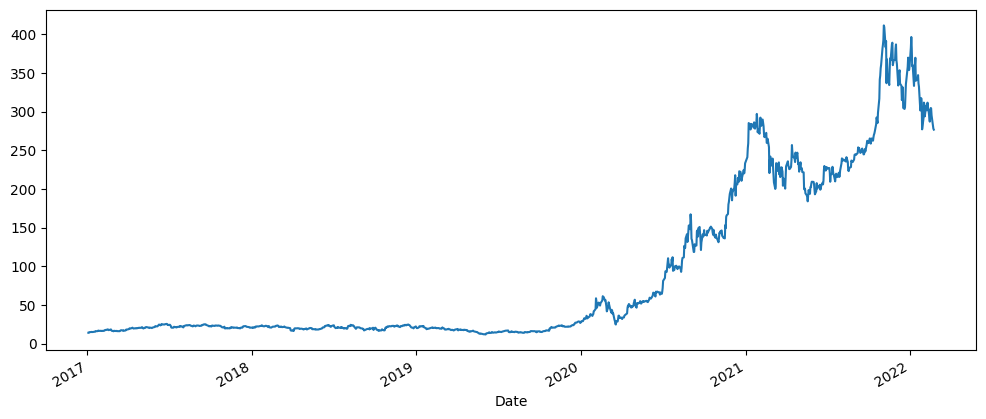

In [5]:
df_tesla['Open'].plot(figsize=(12,5))

In [6]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

In [7]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling
Date,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,14.324000
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,14.320333
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,14.578445
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,14.716000
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,14.825734


<Axes: xlabel='Date'>

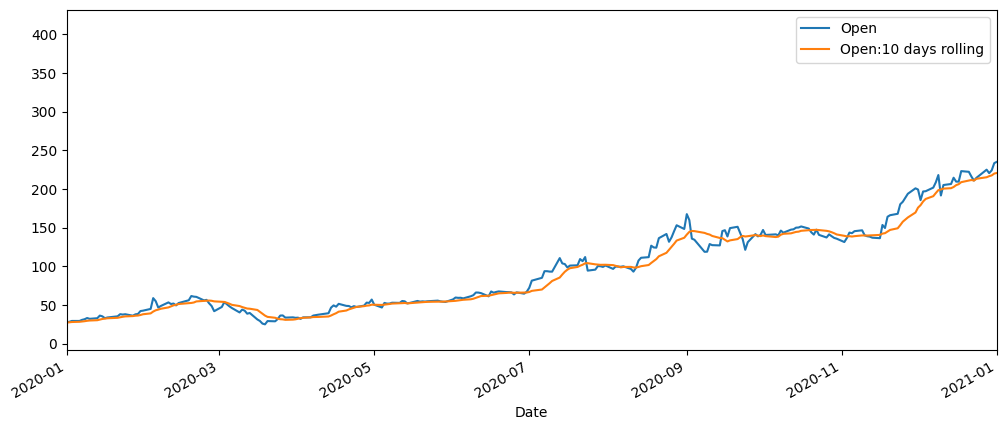

In [8]:
df_tesla[['Open',"Open:10 days rolling"]].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,5))

In [9]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

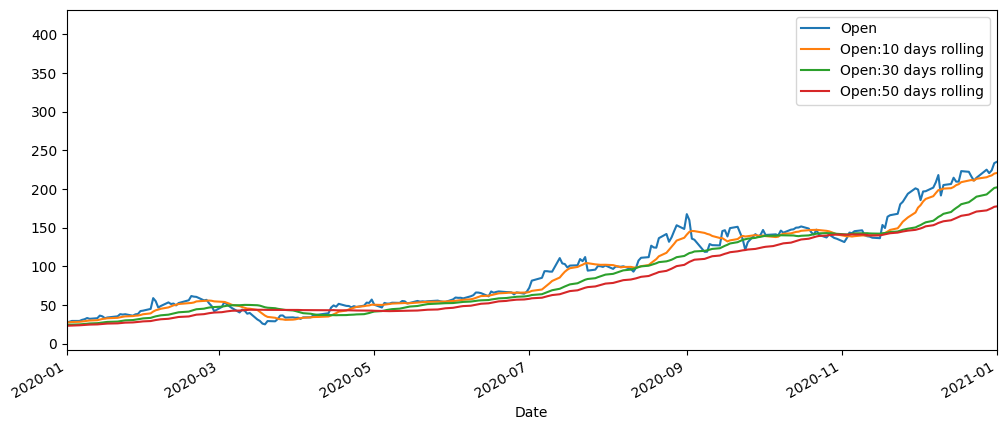

In [10]:
df_tesla[['Open',"Open:10 days rolling",'Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,5))

# **Disadvantages of simple moving average**
* similar importance to all the data
*

# **Cumulative Moving average**

<Axes: xlabel='Date'>

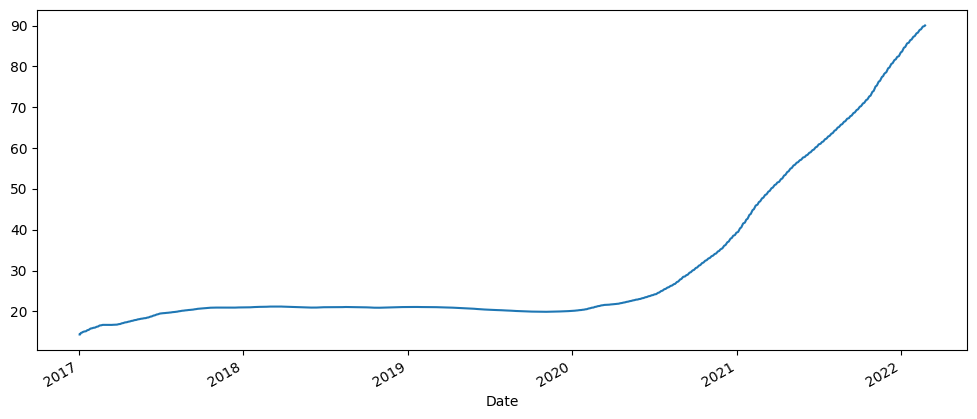

In [11]:
## expanding

df_tesla['Open'].expanding().mean().plot(figsize=(12,5))

# **Exponential Moving Average**

Formulae : ((close-Prev EMA)*multiplier)+Prev EMA

multiplier = 2/(window_size+1)


In [13]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

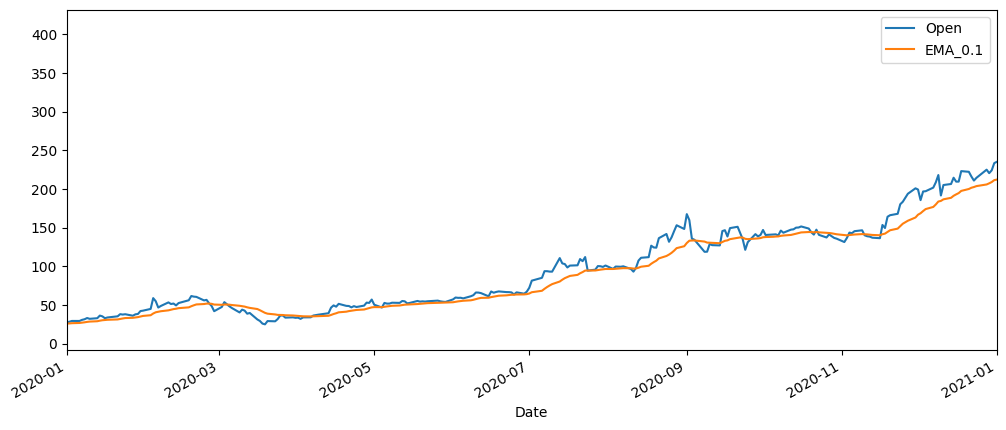

In [15]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,5))

In [16]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

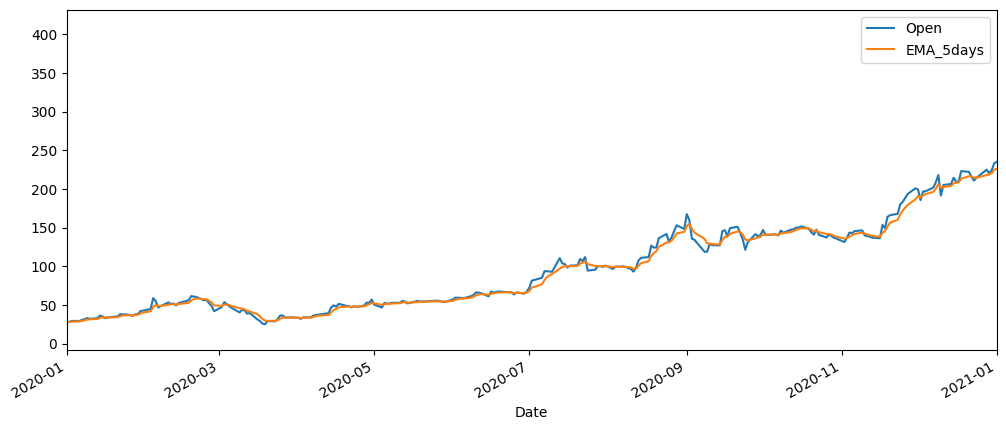

In [17]:
df_tesla[['Open','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,5))

<Axes: xlabel='Date'>

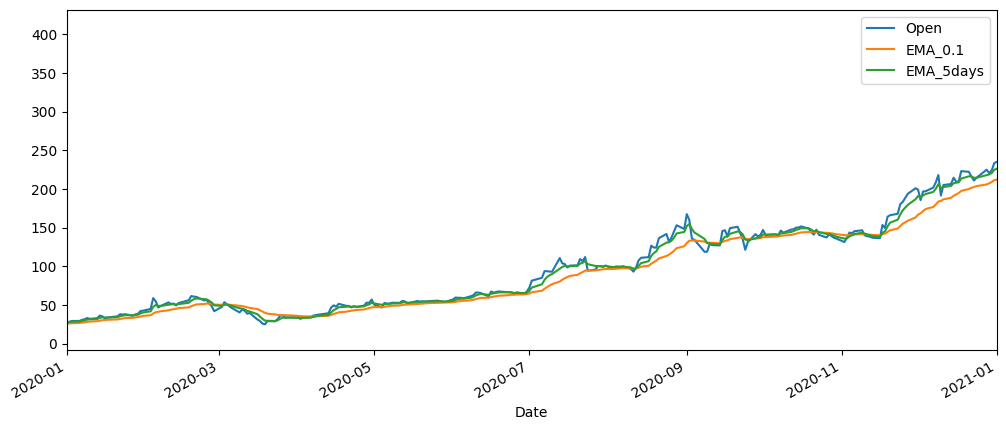

In [18]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,5))

# **Exponential Weighted Moving Average**



EMWA(t) = a*x(t) + (1-a)EMWA(t-1)

In [ ]:
df_tesla['EW'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()